# Credit Card Fraud Detection

## PHASE 1

In [14]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pickle


In [2]:
#read train and test datasets

fraudTrain = pd.read_csv('fraudTrain.csv',index_col=[0])
fraudTest = pd.read_csv('fraudTest.csv',index_col=[0])

In [3]:
fraudTrain.shape

(1048575, 22)

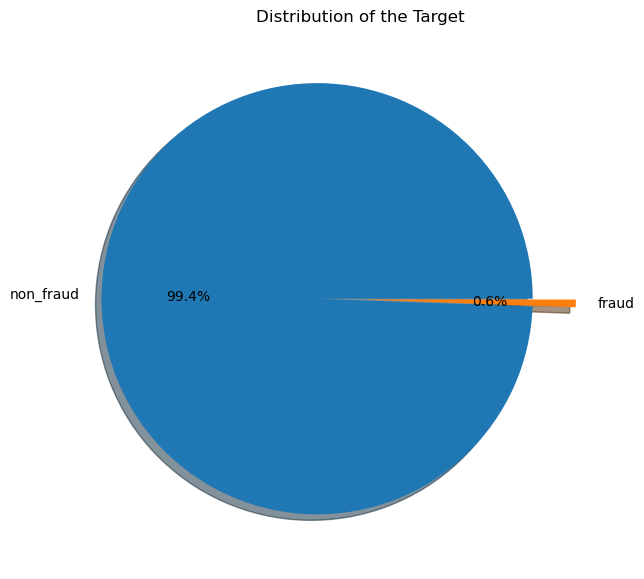

In [4]:
plt.figure(figsize = [7,7])
plot_var = fraudTrain['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True)
plt.title('Distribution of the Target');

In [5]:
fraudTest.shape

(555719, 22)

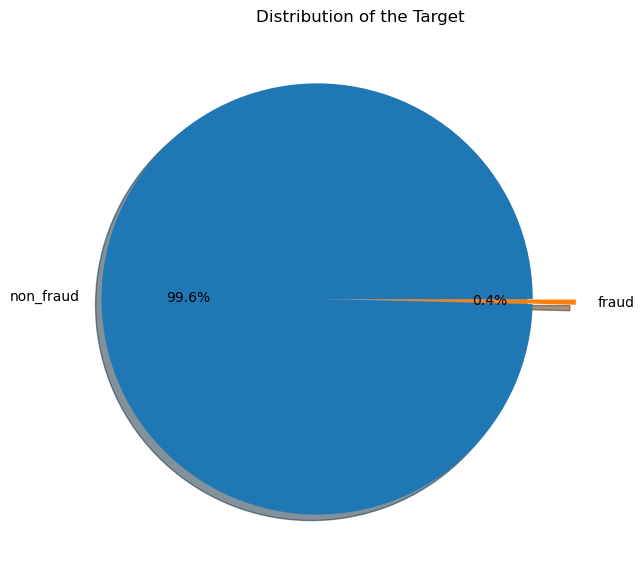

In [6]:
plt.figure(figsize = [7,7])
plot_var = fraudTest['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True) 
plt.title('Distribution of the Target');

In [7]:
fraudTrain.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
fraudTest.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,NaN,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data Cleaning

In [9]:
#1.	Data Concatenation

fraudTrain['label'] = 'fraudTrain'
fraudTest['label'] = 'fraudTest'

data = pd.concat([fraudTrain,fraudTest],axis=0,ignore_index=True)
print(data.shape)
data.head(5)

(1604294, 23)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154.0,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939.0,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain


In [10]:
data.index.value_counts()

0          1
1069513    1
1069535    1
1069534    1
1069533    1
          ..
534762     1
534761     1
534760     1
534759     1
1604293    1
Length: 1604294, dtype: int64

In [11]:
data.isna().sum()

KeyboardInterrupt: 

In [ ]:
#2.	Removing null or missing values 

data.dropna(inplace = True)

In [ ]:
data.shape

In [ ]:
#3.	Removing duplicate rows

data.drop_duplicates(inplace=True)

In [ ]:
data.shape

In [ ]:
data['label'].value_counts().plot(kind='pie')

In [ ]:
data.dtypes

In [ ]:
#4.	Modifying datatypes
#changing object to datetime format

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

In [ ]:
data.dtypes

In [ ]:
data.head(5)

In [ ]:
data['trans_date_trans_time'].value_counts().sum()

In [ ]:
#5.	Splitting columns
#split trans_date_trans_time to year-month, day, hour

data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day_name().str[:3]
data['year-month'] = data['trans_date_trans_time'].dt.to_period('M')


In [ ]:
data.columns

In [25]:
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label,hour,day,year-month
0,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain,0,Tue,2019-01
1,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain,0,Tue,2019-01
2,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain,0,Tue,2019-01
3,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain,0,Tue,2019-01
4,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain,0,Tue,2019-01


In [26]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'label', 'hour', 'day', 'year-month'],
      dtype='object')

In [27]:
#6.	Text to lower case
#conver all text to lower case

data['first'] = data['first'].str.lower()
data['merchant'] = data['merchant'].str.lower()
data['category'] = data['category'].str.lower()
data['last'] = data['last'].str.lower()
data['gender'] = data['gender'].str.lower()
data['street'] = data['street'].str.lower()
data['city'] = data['city'].str.lower()
data['state'] = data['state'].str.lower()
data['job'] = data['job'].str.lower()




In [28]:
data.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label,hour,day,year-month
0,2019-01-01 00:00:00,2.703190e+15,"fraud_rippin, kub and mann",misc_net,4.97,jennifer,banks,f,561 perry cove,moravian falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain,0,Tue,2019-01
1,2019-01-01 00:00:00,6.304230e+11,"fraud_heller, gutmann and zieme",grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain,0,Tue,2019-01
2,2019-01-01 00:00:00,3.885950e+13,fraud_lind-buckridge,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,malad city,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain,0,Tue,2019-01
3,2019-01-01 00:01:00,3.534090e+15,"fraud_kutch, hermiston and farrell",gas_transport,45.00,jeremy,white,m,9443 cynthia court apt. 038,boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain,0,Tue,2019-01
4,2019-01-01 00:03:00,3.755340e+14,fraud_keeling-crist,misc_pos,41.96,tyler,garcia,m,408 bradley rest,doe hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain,0,Tue,2019-01
5,2019-01-01 00:04:00,4.767270e+15,"fraud_stroman, hudson and erdman",gas_transport,94.63,jennifer,conner,f,4655 david island,dublin,...,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,fraudTrain,0,Tue,2019-01
6,2019-01-01 00:04:00,3.007470e+13,fraud_rowe-vandervort,grocery_net,44.54,kelsey,richards,f,889 sarah station suite 624,holcomb,...,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,fraudTrain,0,Tue,2019-01
7,2019-01-01 00:05:00,6.011360e+15,fraud_corwin-collins,gas_transport,71.65,steven,williams,m,231 flores pass suite 720,edinburg,...,1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,fraudTrain,0,Tue,2019-01
8,2019-01-01 00:05:00,4.922710e+15,fraud_herzog ltd,misc_pos,4.27,heather,chase,f,6888 hicks stream suite 954,manor,...,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,fraudTrain,0,Tue,2019-01
9,2019-01-01 00:06:00,2.720830e+15,"fraud_schoen, kuphal and nitzsche",grocery_pos,198.39,melissa,aguilar,f,21326 taylor squares suite 708,clarksville,...,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,fraudTrain,0,Tue,2019-01


In [29]:
#r7. Removing unwanted text

data['merchant'] = data['merchant'].str[6:]

In [30]:
data['merchant']

0                  rippin, kub and mann
1             heller, gutmann and zieme
2                        lind-buckridge
3          kutch, hermiston and farrell
4                         keeling-crist
                       ...             
1604289                 reilly and sons
1604290                  hoppe-parisian
1604291                       rau-robel
1604292                 breitenberg llc
1604293                     dare-marvin
Name: merchant, Length: 1604223, dtype: object

In [31]:
#8.	Removing extra punctuations

data=data.replace("!!","!")
data=data.replace("??","?")
data=data.replace("..",".")
data=data.replace("**","*")
data=data.replace(",,",",")
data=data.replace("//","/")
data=data.replace("__","_")
data=data.replace("--","-")

In [32]:
#9.	Creating a new column – age

data['age'] = np.round((data['trans_date_trans_time']-data['dob'])/np.timedelta64(1,'Y'))


In [33]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'label', 'hour', 'day', 'year-month', 'age'],
      dtype='object')

In [34]:
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,label,hour,day,year-month,age
0,2019-01-01 00:00:00,2.703190e+15,"rippin, kub and mann",misc_net,4.97,jennifer,banks,f,561 perry cove,moravian falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain,0,Tue,2019-01,31.0
1,2019-01-01 00:00:00,6.304230e+11,"heller, gutmann and zieme",grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain,0,Tue,2019-01,41.0
2,2019-01-01 00:00:00,3.885950e+13,lind-buckridge,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,malad city,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain,0,Tue,2019-01,57.0
3,2019-01-01 00:01:00,3.534090e+15,"kutch, hermiston and farrell",gas_transport,45.00,jeremy,white,m,9443 cynthia court apt. 038,boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain,0,Tue,2019-01,52.0
4,2019-01-01 00:03:00,3.755340e+14,keeling-crist,misc_pos,41.96,tyler,garcia,m,408 bradley rest,doe hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain,0,Tue,2019-01,33.0


In [35]:
data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                             float64
lat                             float64
long                            float64
city_pop                        float64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
label                            object
hour                              int64
day                              object


In [36]:
data['age']=data['age'].astype(int)

In [37]:
data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                             float64
lat                             float64
long                            float64
city_pop                        float64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
label                            object
hour                              int64
day                              object


In [38]:
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,label,hour,day,year-month,age
0,2019-01-01 00:00:00,2.703190e+15,"rippin, kub and mann",misc_net,4.97,jennifer,banks,f,561 perry cove,moravian falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain,0,Tue,2019-01,31
1,2019-01-01 00:00:00,6.304230e+11,"heller, gutmann and zieme",grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain,0,Tue,2019-01,41
2,2019-01-01 00:00:00,3.885950e+13,lind-buckridge,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,malad city,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain,0,Tue,2019-01,57
3,2019-01-01 00:01:00,3.534090e+15,"kutch, hermiston and farrell",gas_transport,45.00,jeremy,white,m,9443 cynthia court apt. 038,boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain,0,Tue,2019-01,52
4,2019-01-01 00:03:00,3.755340e+14,keeling-crist,misc_pos,41.96,tyler,garcia,m,408 bradley rest,doe hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain,0,Tue,2019-01,33


In [39]:
#10. Removing unwanted columns

data.drop(['trans_date_trans_time','dob', 'first', 'last'] , axis=1, inplace=True)


In [40]:
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'label', 'hour',
       'day', 'year-month', 'age'],
      dtype='object')

# Exploratory Data Analysis (EDA)

array([[<AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'zip'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'city_pop'}>],
       [<AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>,
        <AxesSubplot:title={'center':'merch_long'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

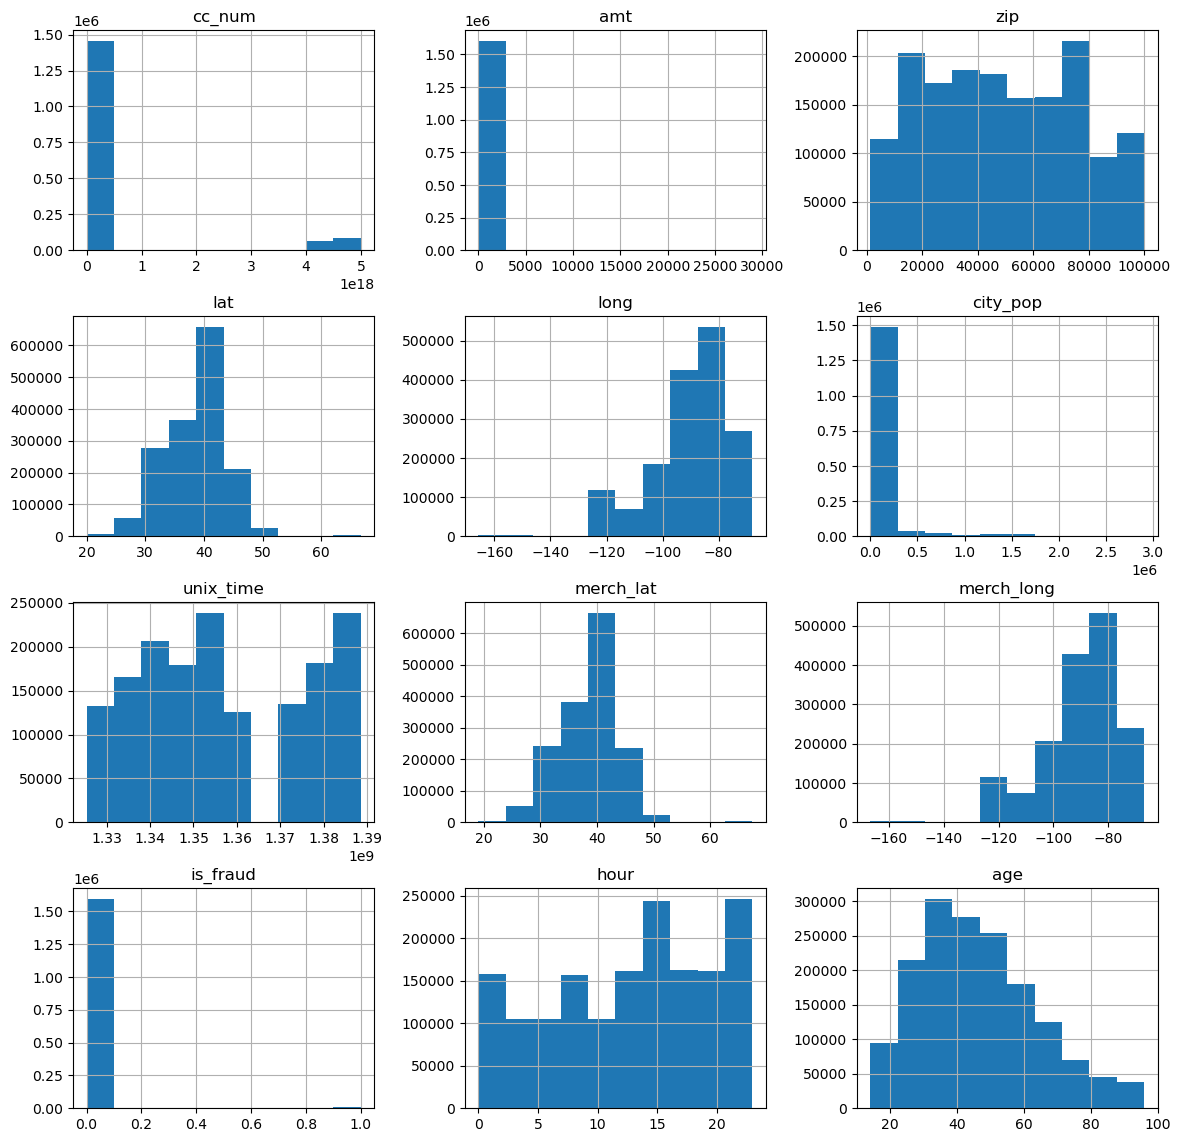

In [41]:
#1.	Histogram representation of the dataset
data.hist(figsize=(14,14))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

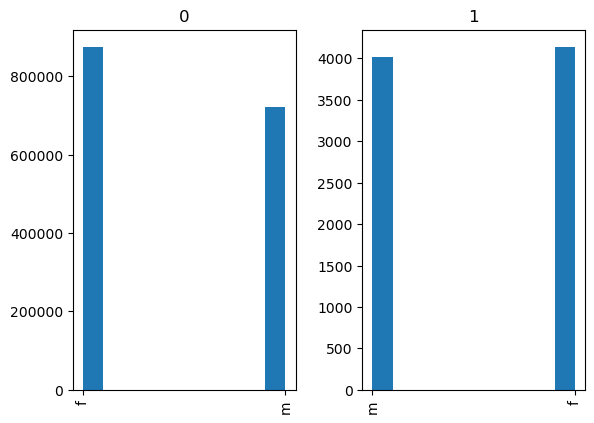

In [42]:
#2.	Trends in fraud and non-fraud transactions on the basis of gender
#non-fraud and fraud transaction distribution on the basis of gender 

data.hist(column="gender", by="is_fraud")

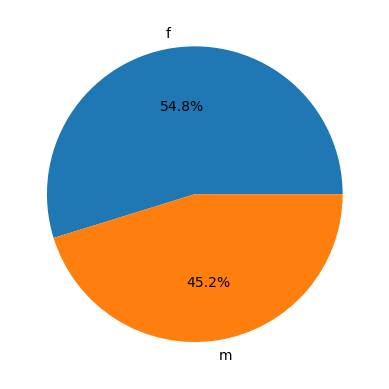

In [43]:
# gender pie chart

plt.pie(data['gender'].value_counts().values, labels=data['gender'].value_counts().index, autopct='%1.1f%%')
plt.show()


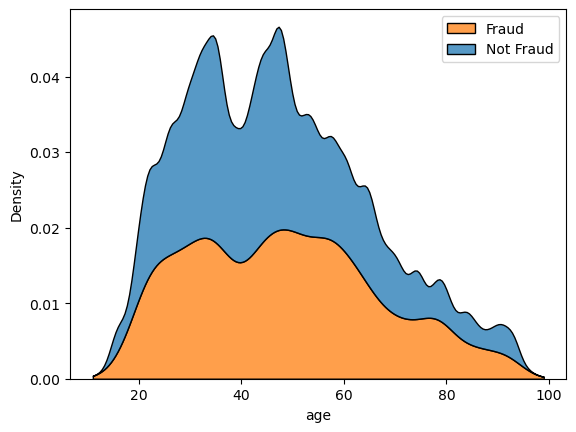

In [44]:
#3.	Fraudulent transactions distribution with respect to age of card holders

sns.kdeplot(data=data,x='age', hue='is_fraud',common_norm=False, multiple="stack")

plt.legend(labels=['Fraud', 'Not Fraud'])

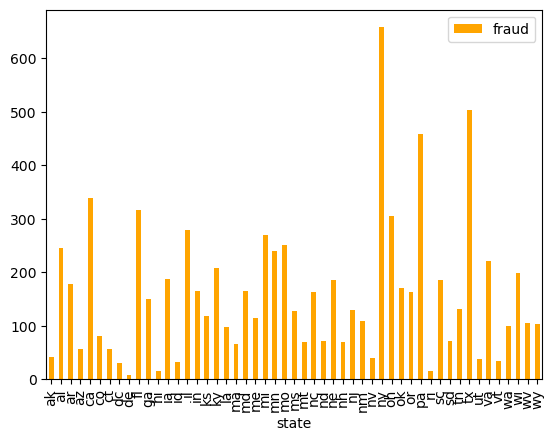

In [45]:
#4.	Bar plots for fraud transactions and non-fraud transactions in each state
# Fraud transactions

fraud_data = data[data['is_fraud'] == True]
fraud = fraud_data.groupby('state').size().reset_index(name='fraud')
fig, ax = plt.subplots()
fraud.plot.bar(x='state', y='fraud', ax=ax,color="orange")
plt.show()


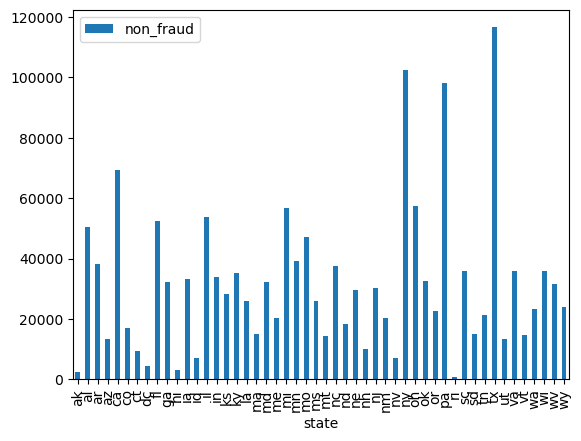

In [46]:
# Non-Fraud transactions

fraud_data = data[data['is_fraud'] == False]
non_fraud = fraud_data.groupby('state').size().reset_index(name='non_fraud')
fig, ax = plt.subplots()
non_fraud.plot.bar(x='state', y='non_fraud', ax=ax)
plt.show()

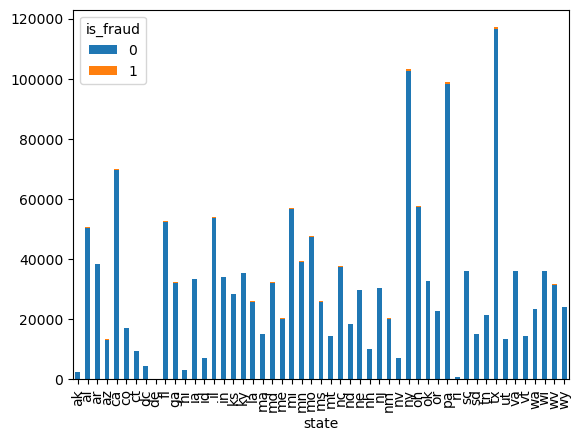

In [47]:
# Fraud and Non-Fraud transactions

counts = data.groupby(['state', 'is_fraud']).size().reset_index(name='counts')
pivot = counts.pivot(index='state', columns='is_fraud', values='counts')
fig, ax = plt.subplots()
pivot.plot.bar(ax=ax, stacked=True)
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

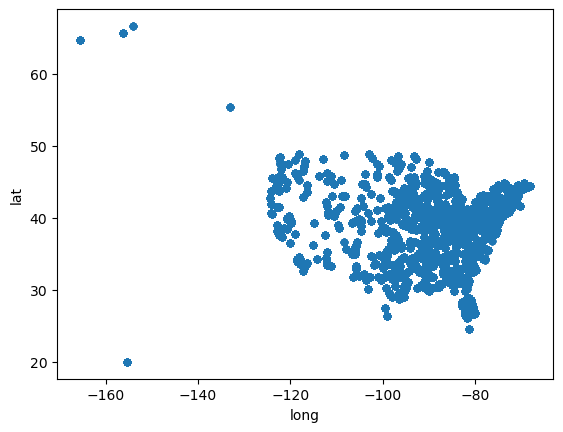

In [48]:
#5.	Geographic distribution of data points

data.plot(kind="scatter", x = "long", y= "lat")

(8151, 23)

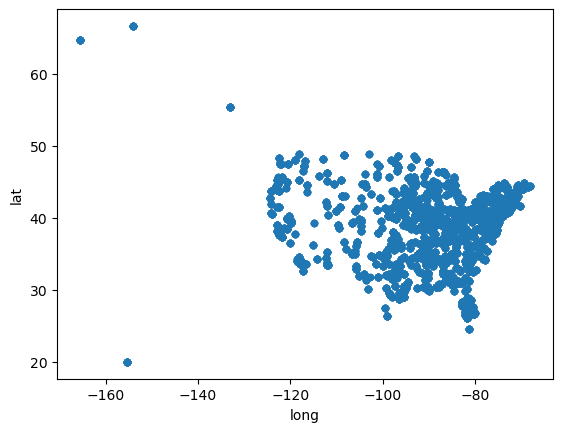

In [49]:
data_fraud = data[data['is_fraud'] == 1]
data_fraud.plot(kind="scatter", x = "long", y= "lat")
data_fraud.shape

(1596072, 23)

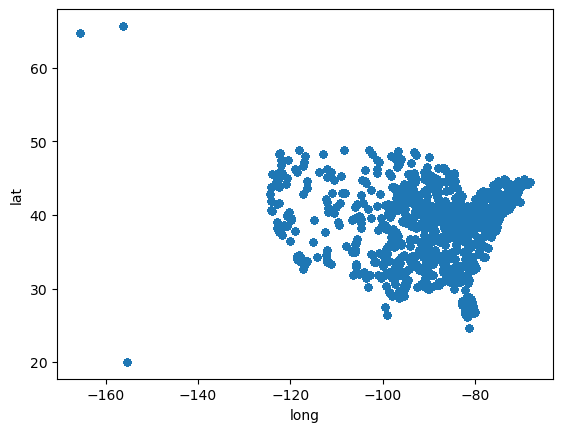

In [50]:
data_non_fraud = data[data['is_fraud'] == 0]
data_non_fraud.plot(kind="scatter", x = "long", y= "lat")
data_non_fraud.shape

Text(0, 0.5, 'Latitude')

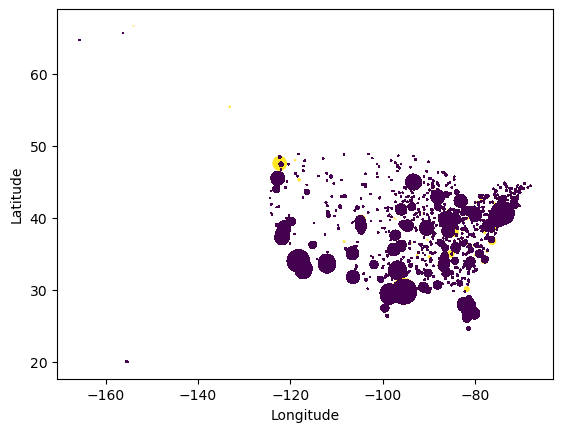

In [51]:
#population and fraud by location

plt.scatter(data['long'], data['lat'], s=data['city_pop']/10000, c  =data.is_fraud, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

<AxesSubplot:xlabel='count', ylabel='category'>

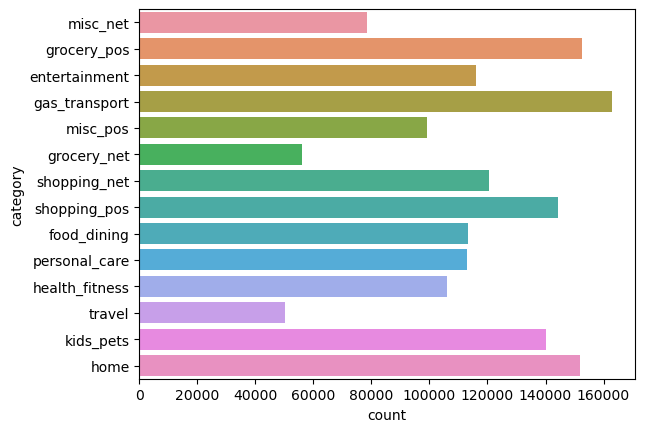

In [52]:
#6.	Categorical distribution of data
#category wise distribution of all data

sns.countplot(y='category', data=data)


In [53]:
data['category'].value_counts()

gas_transport     162797
grocery_pos       152457
home              151913
shopping_pos      144136
kids_pets         140088
shopping_net      120670
entertainment     116083
food_dining       113303
personal_care     112820
health_fitness    106029
misc_pos           99063
misc_net           78446
grocery_net        56144
travel             50274
Name: category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category'>

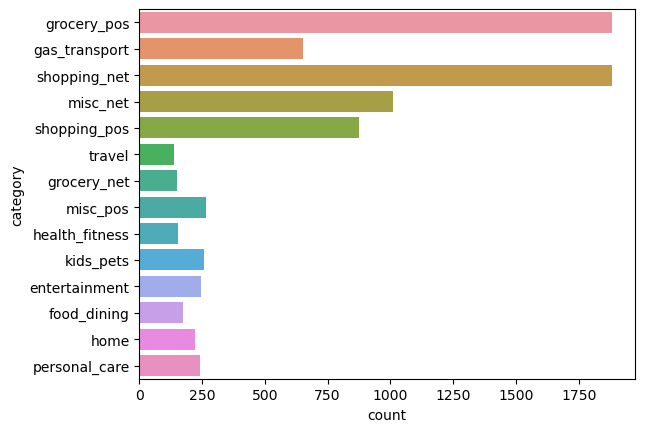

In [54]:
#category wise distribution of fraud data


sns.countplot(y='category', data=data_fraud)


In [55]:
data_fraud['category'].value_counts()


grocery_pos       1881
shopping_net      1881
misc_net          1009
shopping_pos       875
gas_transport      652
misc_pos           266
kids_pets          259
entertainment      244
personal_care      242
home               220
food_dining        175
health_fitness     156
grocery_net        151
travel             140
Name: category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category'>

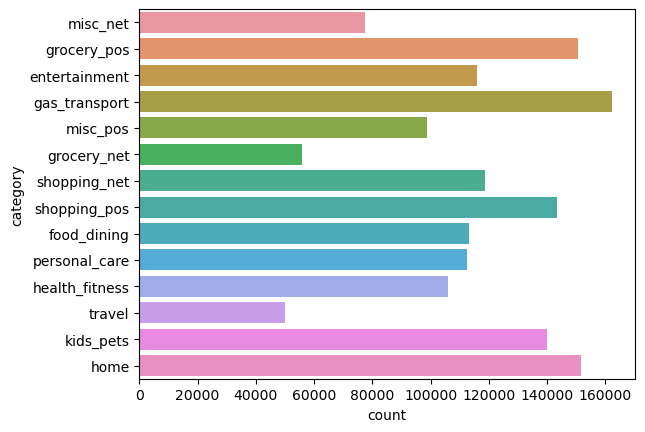

In [56]:
#category wise distribution of non-fraud data

sns.countplot(y='category', data=data_non_fraud)

In [57]:
data_non_fraud['category'].value_counts()


gas_transport     162145
home              151693
grocery_pos       150576
shopping_pos      143261
kids_pets         139829
shopping_net      118789
entertainment     115839
food_dining       113128
personal_care     112578
health_fitness    105873
misc_pos           98797
misc_net           77437
grocery_net        55993
travel             50134
Name: category, dtype: int64

In [58]:
data_copy=data.copy()
data_copy

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,label,hour,day,year-month,age
0,2.703190e+15,"rippin, kub and mann",misc_net,4.97,f,561 perry cove,moravian falls,nc,28654.0,36.0788,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,fraudTrain,0,Tue,2019-01,31
1,6.304230e+11,"heller, gutmann and zieme",grocery_pos,107.23,f,43039 riley greens suite 393,orient,wa,99160.0,48.8878,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,fraudTrain,0,Tue,2019-01,41
2,3.885950e+13,lind-buckridge,entertainment,220.11,m,594 white dale suite 530,malad city,id,83252.0,42.1808,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,fraudTrain,0,Tue,2019-01,57
3,3.534090e+15,"kutch, hermiston and farrell",gas_transport,45.00,m,9443 cynthia court apt. 038,boulder,mt,59632.0,46.2306,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,fraudTrain,0,Tue,2019-01,52
4,3.755340e+14,keeling-crist,misc_pos,41.96,m,408 bradley rest,doe hill,va,24433.0,38.4207,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,fraudTrain,0,Tue,2019-01,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604289,3.056060e+13,reilly and sons,health_fitness,43.77,m,558 michael estates,luray,mo,63453.0,40.4931,...,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,fraudTest,23,Thu,2020-12,55
1604290,3.556610e+15,hoppe-parisian,kids_pets,111.84,m,572 davis mountains,lake jackson,tx,77566.0,29.0393,...,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,fraudTest,23,Thu,2020-12,21
1604291,6.011720e+15,rau-robel,kids_pets,86.88,f,144 evans islands apt. 683,burbank,wa,99323.0,46.1966,...,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,fraudTest,23,Thu,2020-12,39
1604292,4.079770e+12,breitenberg llc,travel,7.99,m,7020 doyle stream apt. 951,mesa,id,83643.0,44.6255,...,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,fraudTest,23,Thu,2020-12,55


In [59]:
#statistics

data_copy['class']=data_copy['is_fraud'].map({1:'fraud',0:'non_fraud'})
stats = data_copy.groupby('class')['amt'].agg([np.min,np.max,np.mean,np.median])
stats.transpose()

class,fraud,non_fraud
amin,1.180000,1.000000
amax,1371.810000,28948.900000
mean,529.990071,67.621361
median,384.910000,47.200000


<AxesSubplot:xlabel='class', ylabel='amt'>

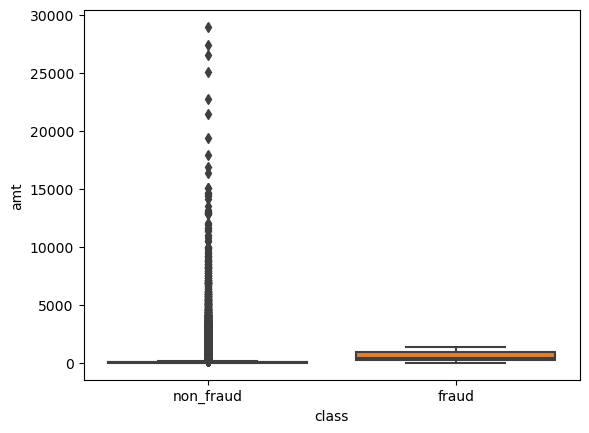

In [60]:
#7.	Box plot for amount distribution
sns.boxplot(data = data_copy, x = 'class', y = 'amt')

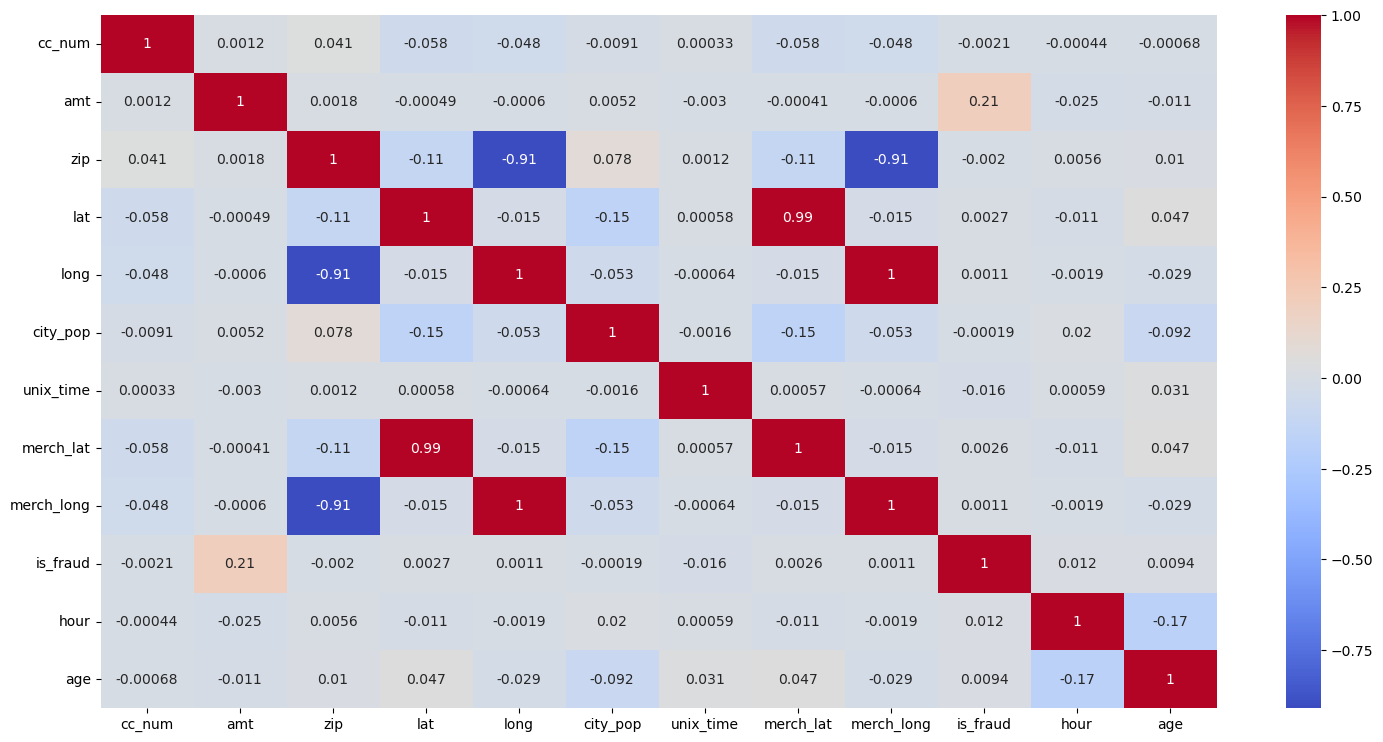

In [61]:
#10.	Correlation between columns of the data

fig = plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),cmap='coolwarm', annot=True)
plt.show()

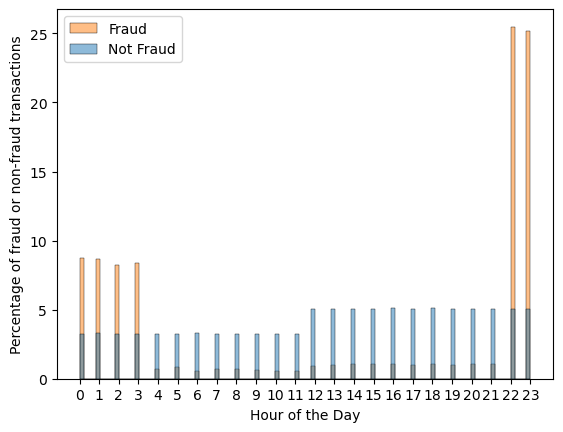

In [62]:
#8. Percentage of fraud and non-fraud transactions in the hour of the day

hour_plot=sns.histplot(data=data, x="hour", hue="is_fraud", common_norm=False,stat='percent')
plt.xticks(np.arange(0,24,1))
hour_plot.set_ylabel('Percentage of fraud or non-fraud transactions')
hour_plot.set_xlabel('Hour of the Day')
plt.legend(labels=['Fraud', 'Not Fraud'])


/var/folders/39/pvtsdq8x67v91gdprr9x6rjm0000gn/T/ipykernel_11891/2091960390.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  day_plot.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


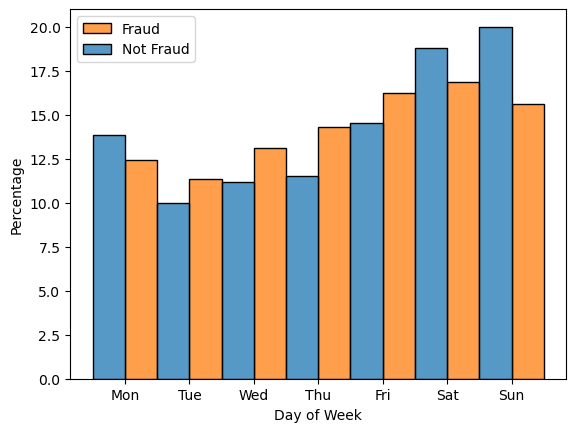

In [63]:
#9.	Percentage of fraud and non-fraud transactions in the days of a week 

day_plot=sns.histplot(data=data, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
day_plot.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
day_plot.set_ylabel('Percentage')
day_plot.set_xlabel('Day of Week')
plt.legend(labels=['Fraud', 'Not Fraud'])

# Phase 2

## One Hot Encoding

In [64]:
# one hot encoding for - category, gender, day, age

ohe_category = pd.get_dummies(data.category, prefix='category', drop_first=True)

ohe_gender = pd.get_dummies(data.gender, prefix='gender', drop_first=True)

ohe_day_of_week = pd.get_dummies(data.day, prefix='day', drop_first=True)


In [65]:
# concatenation of encoded data to our dataset

data_new = pd.concat([data, ohe_category, ohe_gender, ohe_day_of_week], axis=1)

data_new.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,category_shopping_net,category_shopping_pos,category_travel,gender_m,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2.703190e+15,"rippin, kub and mann",misc_net,4.97,f,561 perry cove,moravian falls,nc,28654.0,36.0788,...,0,0,0,0,0,0,0,0,1,0
1,6.304230e+11,"heller, gutmann and zieme",grocery_pos,107.23,f,43039 riley greens suite 393,orient,wa,99160.0,48.8878,...,0,0,0,0,0,0,0,0,1,0
2,3.885950e+13,lind-buckridge,entertainment,220.11,m,594 white dale suite 530,malad city,id,83252.0,42.1808,...,0,0,0,1,0,0,0,0,1,0
3,3.534090e+15,"kutch, hermiston and farrell",gas_transport,45.00,m,9443 cynthia court apt. 038,boulder,mt,59632.0,46.2306,...,0,0,0,1,0,0,0,0,1,0
4,3.755340e+14,keeling-crist,misc_pos,41.96,m,408 bradley rest,doe hill,va,24433.0,38.4207,...,0,0,0,1,0,0,0,0,1,0


In [66]:
data_new.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'label', 'hour',
       'day', 'year-month', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_m', 'day_Mon',
       'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed'],
      dtype='object')

In [67]:
# dropping unwanted columns

data_new.drop(['merchant','street','city','state','job', 'category','gender','day'],
              axis=1, inplace=True)


In [68]:
data_new.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'label', 'hour',
       'year-month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_m', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue',
       'day_Wed'],
      dtype='object')

## Logistic Regression

In [69]:
#collecting numerical Data

data_lr = data_new.select_dtypes(include='number')

In [70]:
data_lr.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_m', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue',
       'day_Wed'],
      dtype='object')

In [71]:
#dropping less significant columns

data_lr.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],axis=1, inplace=True)


In [72]:
data_lr

,cc_num,amt,is_fraud,hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,category_shopping_net,category_shopping_pos,category_travel,gender_m,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2.703190e+15,4.97,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.304230e+11,107.23,0,0,41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3.885950e+13,220.11,0,0,57,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3.534090e+15,45.00,0,0,52,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.755340e+14,41.96,0,0,33,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604289,3.056060e+13,43.77,0,23,55,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1604290,3.556610e+15,111.84,0,23,21,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1604291,6.011720e+15,86.88,0,23,39,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1604292,4.079770e+12,7.99,0,23,55,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [73]:
data_lr.columns

Index(['cc_num', 'amt', 'is_fraud', 'hour', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_m', 'day_Mon',
       'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed'],
      dtype='object')

In [74]:
#feature selection

target = data_lr.is_fraud.values
features = data_lr.drop(['is_fraud'],axis=1).values

In [75]:
data_lr.drop(['is_fraud'],axis=1)

,cc_num,amt,hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_net,category_shopping_pos,category_travel,gender_m,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2.703190e+15,4.97,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.304230e+11,107.23,0,41,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.885950e+13,220.11,0,57,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3.534090e+15,45.00,0,52,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.755340e+14,41.96,0,33,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604289,3.056060e+13,43.77,23,55,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1604290,3.556610e+15,111.84,23,21,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1604291,6.011720e+15,86.88,23,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1604292,4.079770e+12,7.99,23,55,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [76]:
#feature scaling

features = StandardScaler().fit_transform(features)


In [77]:
#train, test, split 


stratified_kf = StratifiedKFold(n_splits=3)

stratified_kf.get_n_splits(features,target)

for i, j in stratified_kf.split(features,target):
    features_train, features_test = features[i], features[j]
    target_train, target_test = target[i], target[j]



In [78]:
#Prediction 

lr = LogisticRegression(random_state=22)

model = lr.fit(features_train, target_train)

target_train_pred = model.predict(features_train)
target_test_pred = model.predict(features_test)


In [79]:
print('target_train_pred: ',target_train_pred)
print('target_test_pred: ', target_test_pred)

target_train_pred:  [0 0 0 ... 0 0 0]
target_test_pred:  [0 0 0 ... 0 0 0]


## Pickle Dump

In [80]:
import pickle

# Save the trained model to a pickle file
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(model, f)


## Model evaluation

In [108]:
#evaluating the model

#Accuracy, Preciision, Recall, F1 score, 
accuracy = accuracy_score(target_test,target_test_pred)
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test,target_test_pred)
f1 = f1_score(target_test, target_test_pred)


df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df


,Accuracy,Precision,Recall,F1 Score
0,0.994549,0.037383,0.002944,0.005459


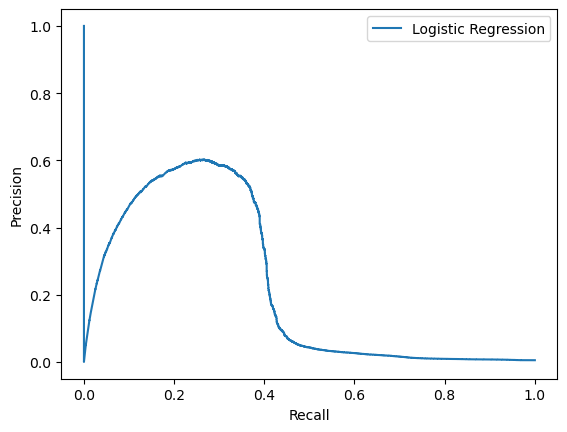

In [109]:
#Precision-Recall curve 

target_score = model.predict_proba(features_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(target_test, target_score)

plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


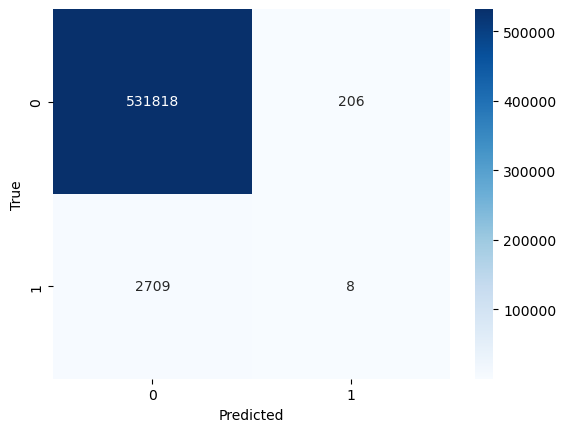

In [110]:
#Confusion matrix 

c = confusion_matrix(target_test, target_test_pred)
sns.heatmap(c, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree

In [111]:
#test train split

features_train, features_test, target_train, target_test = train_test_split(features,target, 
                                                                            test_size=0.2, random_state=26)


In [112]:
#prediction

dt = DecisionTreeClassifier(max_depth=12)
model = dt.fit(features_train,target_train)
target_test_pred = model.predict(features_test)
print(target_test_pred)

[0 0 0 ... 0 0 0]


## Pickle Dump


In [113]:

# Save the trained model to a pickle file
with open('decTree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Model evaluation

In [114]:
#evaluation

#Accuracy, Preciision, Recall, F1 score, 
accuracy = accuracy_score(target_test,target_test_pred)
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test,target_test_pred)
f1 = f1_score(target_test, target_test_pred)


df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df


,Accuracy,Precision,Recall,F1 Score
0,0.998629,0.917598,0.803178,0.856584


In [115]:

graph_features = data_lr.drop(['is_fraud','category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'day_Mon',
       'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed'],axis=1)

fraud_or_not = data_lr.is_fraud

print(graph_features.columns)



Index(['cc_num', 'amt', 'hour', 'age', 'gender_m'], dtype='object')


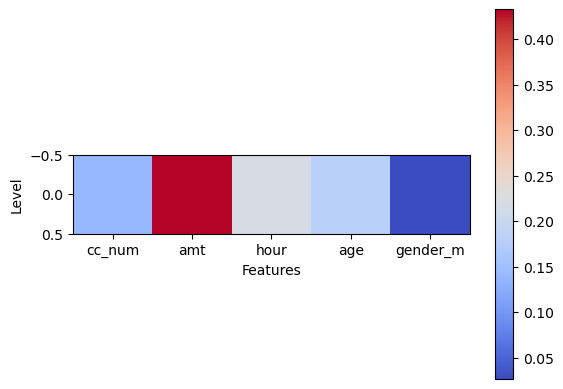

In [117]:
#Decision Tree heatmap 

dt2 = DecisionTreeClassifier()
dt2.fit(graph_features, fraud_or_not)

importance = dt2.feature_importances_

fig, ax = plt.subplots()
im = ax.imshow(importance.reshape(1, -1), cmap='coolwarm')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(graph_features.columns)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Level')
plt.show()


# Random Forest

In [118]:
# test train split

features_train, features_test, target_train, target_test = train_test_split(features,target, 
                                                                            test_size=0.2, random_state=34)

In [119]:
#model

rf = RandomForestClassifier(n_estimators=70, 
                            random_state=34, 
                            n_jobs=-1)
model = rf.fit(features_train,target_train)


In [120]:
#prediction

target_test_pred = model.predict(features_test)
print(target_test_pred)

[0 0 0 ... 0 0 0]


## Pickle Dump

In [121]:
# Save the trained model to a pickle file
with open('ranFor_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Model Evaluation

In [353]:
#evaluating the model

#Accuracy, Preciision, Recall, F1 score, 
accuracy = accuracy_score(target_test,target_test_pred)
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test,target_test_pred)
f1 = f1_score(target_test, target_test_pred)


df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df

,Accuracy,Precision,Recall,F1 Score
0,0.998604,0.962617,0.755501,0.846575


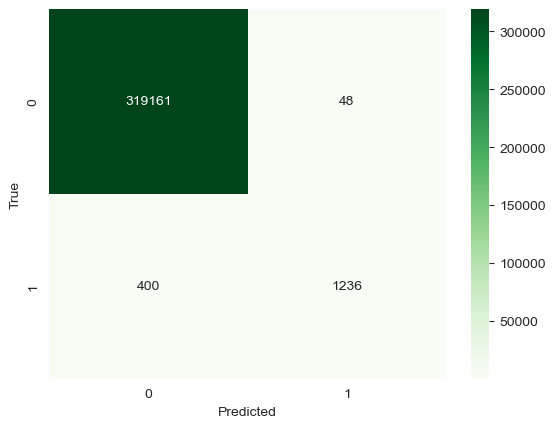

In [354]:
# Confusion Matrix

c = confusion_matrix(target_test, target_test_pred)
sns.heatmap(c, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/var/folders/39/pvtsdq8x67v91gdprr9x6rjm0000gn/T/ipykernel_7423/1690940902.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_feature_names, rotation=45, ha='right')


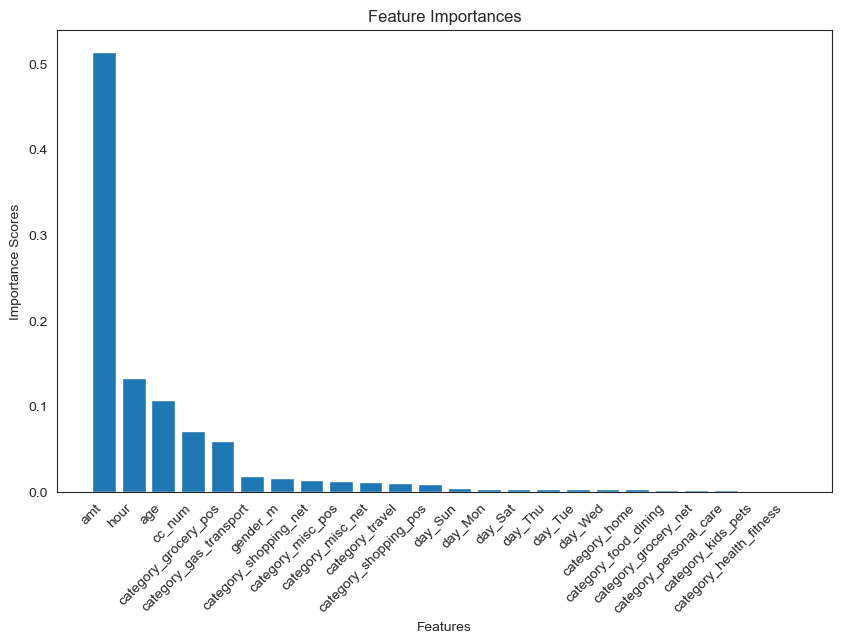

In [355]:
#Feature Importance Plot

#Calculating importance of features

importance_scores = model.feature_importances_
feature_names = data_lr.drop(['is_fraud'],axis=1).columns
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

#plot

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_feature_names, sorted_importance_scores)
ax.set_xticklabels(sorted_feature_names, rotation=45, ha='right')
ax.set_title("Feature Importances")
ax.set_xlabel("Features")
ax.set_ylabel("Importance Scores")
plt.show()

# Naive Bayes

In [356]:
# test train split

features_train, features_test, target_train, target_test = train_test_split(features,target, 
                                                                            test_size=0.2,random_state=27, 
                                                                            stratify=target)


In [357]:
#model

nb = GaussianNB()
nb.fit(features_train,target_train)


GaussianNB()

In [358]:
#prediction

target_test_pred = nb.predict(features_test)
target_pred_prob = nb.predict_proba(features_test) 
print('target_train_pred: ',target_train_pred)
print('target_test_pred: ', target_test_pred)

target_train_pred:  [0 0 0 ... 0 0 0]
target_test_pred:  [0 0 0 ... 0 0 0]


## Model Evaluation

In [359]:
# evalluation metrics

#Accuracy, Preciision, Recall, F1 score, 
accuracy = accuracy_score(target_test,target_test_pred)
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test,target_test_pred)
f1 = f1_score(target_test, target_test_pred)


df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df

,Accuracy,Precision,Recall,F1 Score
0,0.913503,0.039295,0.683436,0.074316


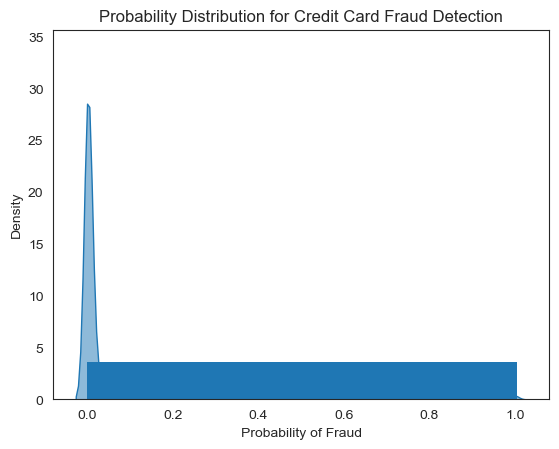

In [360]:
#Probability Distribution plot

y_proba = nb.predict_proba(features_test)[:,1]

sns.kdeplot(y_proba, bw_adjust=0.5, fill=True, alpha=0.5)
sns.rugplot(y_proba, height=0.1, alpha=0.5)
plt.title("Probability Distribution for Credit Card Fraud Detection")
plt.xlabel("Probability of Fraud")
plt.ylabel("Density")
plt.show()

/Users/sriharshithapalala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


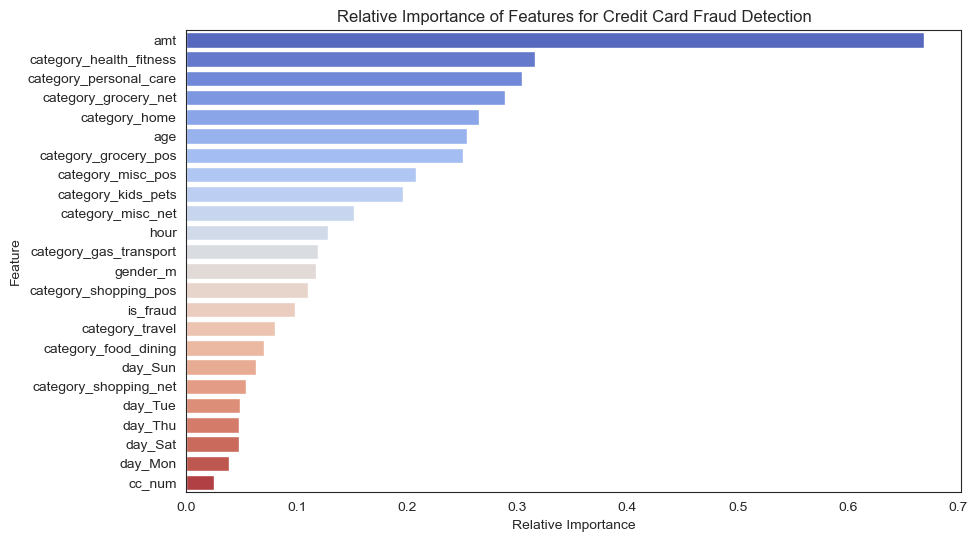

In [361]:
#Relative importance graph

means = nb.theta_
stds = nb.sigma_
importance = np.abs(means[1] - means[0]) / np.sqrt((stds[0] ** 2 + stds[1] ** 2) / 2)
sorted_idx = np.argsort(importance)[::-1]
features_sorted = [data_lr.columns[i] for i in sorted_idx]
importance_sorted = importance[sorted_idx]

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=importance_sorted, y=features_sorted, palette='coolwarm')
ax.set_title("Relative Importance of Features for Credit Card Fraud Detection")
ax.set_xlabel("Relative Importance")
ax.set_ylabel("Feature")
plt.show()


# K Means

In [366]:
#train test split

features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2)
features_train = normalize(features_train)
features_test = normalize(features_test)

In [367]:
#model

km = KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000)
km.fit(features_train)



KMeans(algorithm='elkan', max_iter=10000, n_clusters=2, random_state=0)

In [369]:
#prediction

traget_train_pred = km.predict(features_train)

#confusion matrix between the predicted cluster labels and the true target labels for the training set

tn, fp, fn, tp=confusion_matrix(target_train, traget_train_pred).ravel()

''' if the number of correctly classified samples is less than the number of incorrectly classified samples 
the predicted cluster labels are opposite to the true target labels '''

flg = 0
if tn+tp < fn+fp:
    flg = 1
    
target_test_pred = km.predict(features_test)

if flg:
    target_test_pred = 1 - target_test_pred
    
tn, fp, fn, tp=confusion_matrix(target_test, target_test_pred).ravel()


## Model Evaluation

In [370]:
# evaluation 

#Accuracy, Preciision, Recall, F1 score, 
accuracy = accuracy_score(target_test,target_test_pred)
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test,target_test_pred)
f1 = f1_score(target_test, target_test_pred)


df = pd.DataFrame([[accuracy, precision, recall, f1]], 
                           columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df


,Accuracy,Precision,Recall,F1 Score
0,0.6082,0.005595,0.424939,0.011045


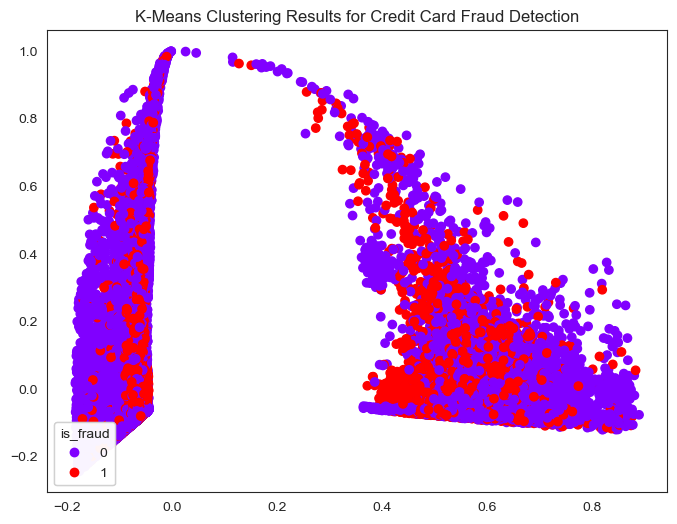

In [371]:
#plot of fraud and non fraud clusters

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(features_test[:,0], features_test[:,1], c=target_test_pred, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="is_fraud")
ax.add_artist(legend1)
ax.set_title("K-Means Clustering Results for Credit Card Fraud Detection")
plt.show()


# Flask API for Prediction

In [125]:
pip install flask_cors


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

#API to obtaiin prediction

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.get_json()
    print(input_data)

    #load pickle by input

    if input_data['model']=="LR":
        with open('logreg_model.pkl', 'rb') as f:
            model = pickle.load(f)
        print("here1")
    elif input_data['model']=="DT":
        with open('decTree_model.pkl', 'rb') as f:
            model = pickle.load(f)
        print("here2")
    elif input_data['model']=="RF":
        with open('ranFor_model.pkl', 'rb') as f:
            model = pickle.load(f)
        print("here3")

    # features array for prediction

    input_array = [[input_data['cc_num'], input_data['amt'], input_data['hour'], input_data['age'], 
                   input_data['category_food_dining'],
       input_data['category_gas_transport'], input_data['category_grocery_net'], input_data['category_grocery_pos'], 
                   input_data['category_health_fitness'], 
        input_data['category_home'],input_data['category_kids_pets'], input_data['category_misc_net'], 
                   input_data['category_misc_pos'],
       input_data['category_personal_care'], input_data['category_shopping_net'],input_data['category_shopping_pos'], 
                  input_data[ 'category_travel'], input_data['gender_m'], input_data['day_Mon'],
       input_data['day_Sat'], input_data['day_Sun'], input_data['day_Thu'], input_data['day_Tue'], input_data['day_Wed']]]
    print(input_array)

    #prediction

    prediction = model.predict(input_array)

    if prediction[0]==0:
        return "Not a Fraud Transaction"
    else:
        return "A Fraud Transaction"
        
#running on port 5000
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/May/2023 13:06:44] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2023 13:06:44] "POST /predict HTTP/1.1" 200 -


{'cc_num': 98765678987656, 'amt': 5000, 'hour': 11, 'age': 29, 'category_food_dining': 0, 'category_gas_transport': 0, 'category_grocery_net': 0, 'category_grocery_pos': 0, 'category_health_fitness': 0, 'category_home': 1, 'category_kids_pets': 0, 'category_misc_net': 0, 'category_misc_pos': 0, 'category_personal_care': 0, 'category_shopping_net': 0, 'category_shopping_pos': 0, 'category_travel': 0, 'gender_m': 1, 'day_Mon': 1, 'day_Tue': 0, 'day_Wed': 0, 'day_Thu': 0, 'day_Sat': 0, 'day_Sun': 0, 'model': 'LR'}
here1
[[98765678987656, 5000, 11, 29, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]]


127.0.0.1 - - [07/May/2023 13:06:52] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2023 13:06:52] "POST /predict HTTP/1.1" 200 -


{'cc_num': 98765678987656, 'amt': 5000, 'hour': 11, 'age': 29, 'category_food_dining': 0, 'category_gas_transport': 0, 'category_grocery_net': 0, 'category_grocery_pos': 0, 'category_health_fitness': 0, 'category_home': 1, 'category_kids_pets': 0, 'category_misc_net': 0, 'category_misc_pos': 0, 'category_personal_care': 0, 'category_shopping_net': 0, 'category_shopping_pos': 0, 'category_travel': 0, 'gender_m': 1, 'day_Mon': 1, 'day_Tue': 0, 'day_Wed': 0, 'day_Thu': 0, 'day_Sat': 0, 'day_Sun': 0, 'model': 'LR'}
here1
[[98765678987656, 5000, 11, 29, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]]


127.0.0.1 - - [07/May/2023 13:27:29] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2023 13:27:29] "POST /predict HTTP/1.1" 200 -


{'cc_num': 6378948736829030, 'amt': 500, 'hour': 23, 'age': 23, 'category_food_dining': 0, 'category_gas_transport': 0, 'category_grocery_net': 0, 'category_grocery_pos': 0, 'category_health_fitness': 0, 'category_home': 0, 'category_kids_pets': 0, 'category_misc_net': 1, 'category_misc_pos': 0, 'category_personal_care': 0, 'category_shopping_net': 0, 'category_shopping_pos': 0, 'category_travel': 0, 'gender_m': 0, 'day_Mon': 0, 'day_Tue': 0, 'day_Wed': 0, 'day_Thu': 0, 'day_Sat': 0, 'day_Sun': 1, 'model': 'LR'}
here1
[[6378948736829030, 500, 23, 23, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]


127.0.0.1 - - [07/May/2023 13:38:17] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2023 13:38:17] "POST /predict HTTP/1.1" 200 -


{'cc_num': 4567890987654344, 'amt': 500, 'hour': 17, 'age': 23, 'category_food_dining': 0, 'category_gas_transport': 0, 'category_grocery_net': 0, 'category_grocery_pos': 0, 'category_health_fitness': 0, 'category_home': 0, 'category_kids_pets': 0, 'category_misc_net': 1, 'category_misc_pos': 0, 'category_personal_care': 0, 'category_shopping_net': 0, 'category_shopping_pos': 0, 'category_travel': 0, 'gender_m': 0, 'day_Mon': 0, 'day_Tue': 0, 'day_Wed': 0, 'day_Thu': 0, 'day_Sat': 0, 'day_Sun': 1, 'model': 'LR'}
here1
[[4567890987654344, 500, 17, 23, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
